In [1]:
from skimage.io import imread
from skimage import morphology
import pyclesperanto_prototype as cle
import numpy as np

In [2]:
cle.select_device()

<Intel(R) Iris(TM) Plus Graphics on Platform: Apple (2 refs)>

# Initialisation

In [3]:
image = imread("https://imagej.nih.gov/nih-image/download/images/Blobs/Blobs")
image = image[:253, :253]

In [4]:
disk = morphology.disk(int(image.shape[0] // 2))

In [5]:
lambda1 = 1
lambda2 = 1

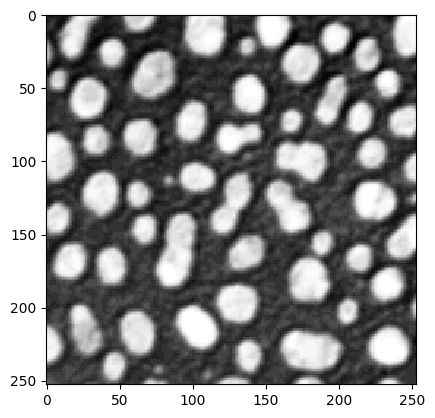

In [6]:
image = cle.push(image)
cle.imshow(image)

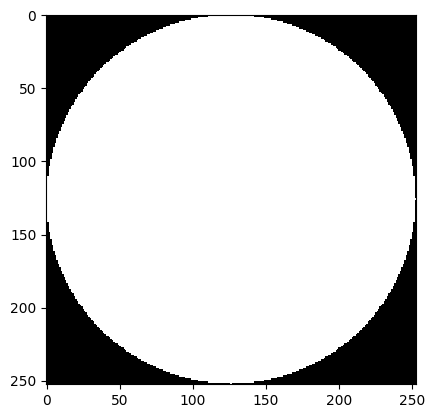

In [7]:
disk = cle.push(disk)
cle.imshow(disk)

# In the loop

In [8]:
curve = cle.greater_constant(disk, constant=0)

In [9]:
invert_curve = 1 - curve
outside_image = (image * invert_curve).sum()
outside_curve_area = invert_curve.sum() + 1e-8
c0 = outside_image / outside_curve_area
c0

99.87446988966647

In [10]:
inside_image = (image * curve).sum()
inside_curve_area = curve.sum() + 1e-8
c1 = inside_image / inside_curve_area
c1

104.09049156653415

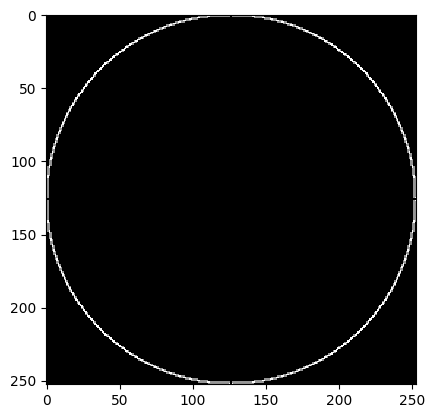

In [19]:


absolute_gradient = cle.create_like(curve)

for e in range(image.ndim):
    if e == 0:   
        absolute_gradient += cle.absolute(cle.gradient_x(curve))
    if e == 1:
        absolute_gradient += cle.absolute(cle.gradient_y(curve))
    if e == 2:
        absolute_gradient += cle.absolute(cle.gradient_z(curve))

cle.imshow(absolute_gradient)   

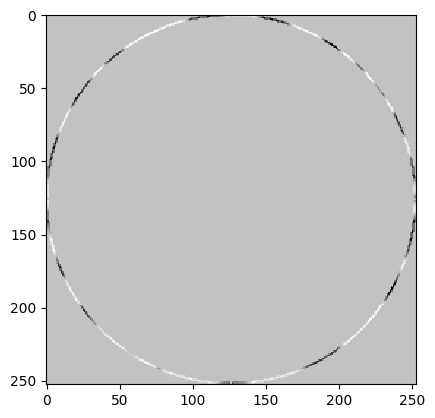

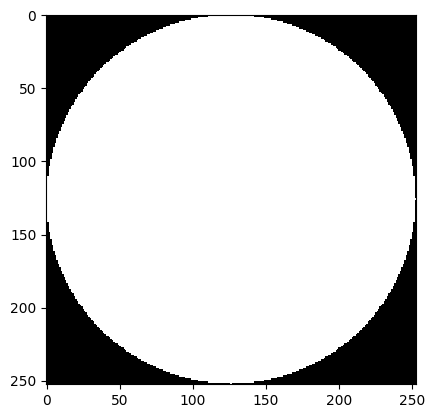

In [12]:
current_curve = absolute_gradient * (lambda1 * (image - c1)**2 - lambda2 * (image - c0)**2)
cle.imshow(current_curve)
cle.imshow(curve)

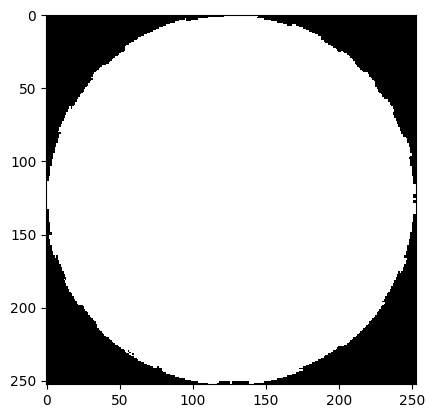

In [20]:
current_curve = absolute_gradient * (lambda1 * (image - c1)**2 - lambda2 * (image - c0)**2)

positive_curve = current_curve > 0
negative_curve = current_curve < 0

combined_mask = cle.binary_or(positive_curve, negative_curve)
inverted_mask = cle.binary_not(combined_mask)
masked_curve = cle.mask(curve, inverted_mask)
curve = masked_curve + positive_curve

cle.imshow(curve)


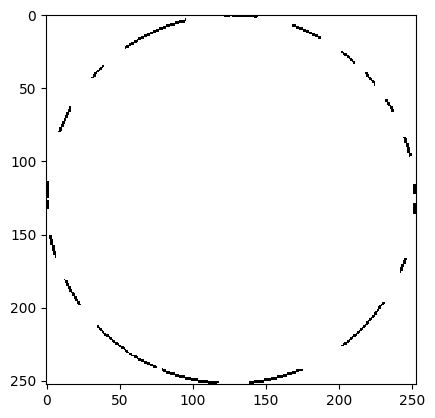

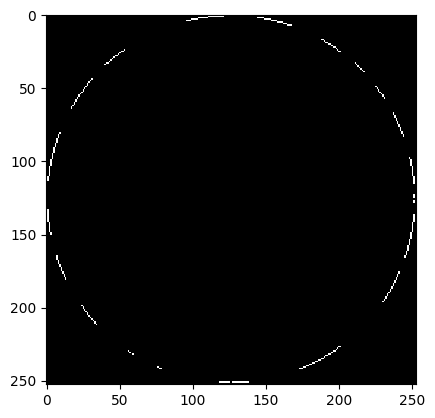

In [29]:
masked_curve = cle.mask(curve, inverted_mask)
cle.imshow(masked_curve)

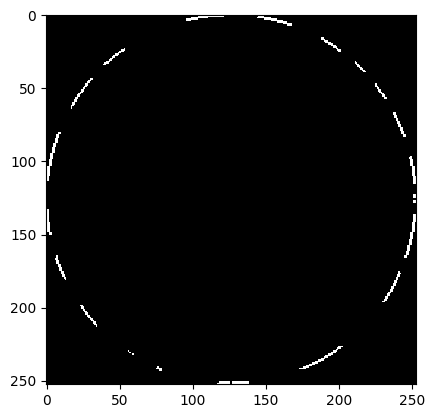

In [21]:
negative_curve = current_curve < 0
cle.imshow(negative_curve)
curve1 = curve + negative_curve
curve1 = cle.replace_intensity(curve1, value_to_replace=2, value_replacement=1)

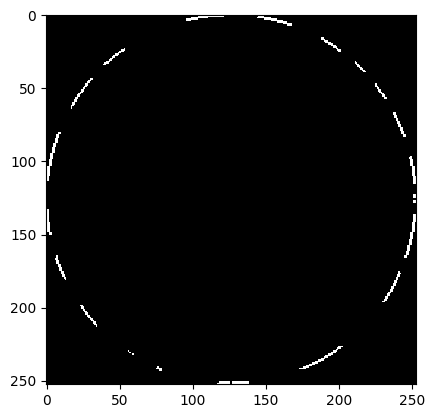

In [15]:
positive_curve = current_curve > 0
curve2 = curve + positive_curve
curve2 = cle.replace_intensity(curve2, value_to_replace=2, value_replacement=1)

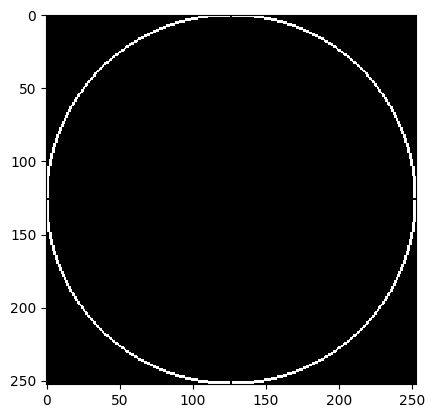

In [25]:
curve_new = cle.push(np.zeros(curve.shape))
curve_new += negative_curve
curve_new += positive_curve
cle.imshow(curve_new)

In [16]:
# cle.replace_intensity?

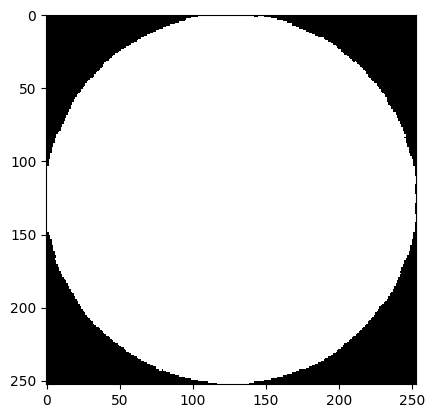

0.0
1.0


In [17]:
cle.imshow(curve1)
print(curve1.min())
print(curve1.max())

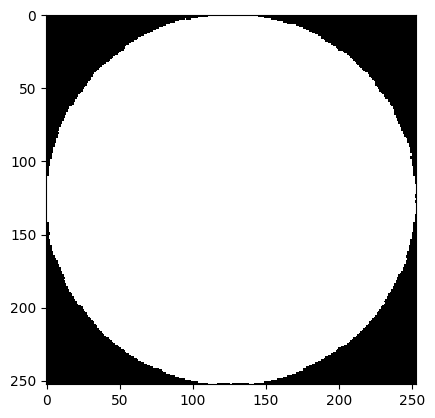

0.0
1.0


In [18]:
cle.imshow(curve2)
print(curve2.min())
print(curve2.max())

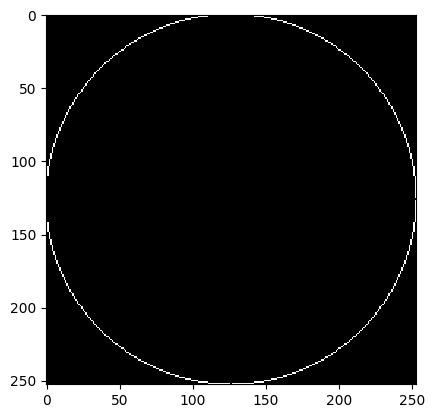

In [20]:
curve = cle.binary_xor(curve1, curve2)
cle.imshow(curve)